# Projeto de Inteligência Artificial - Fase 2 Processo LAIS/UFRN

A realização deste projeto se deve como parte do processo de seleção para novos bolsistas que irão integrar ao Projeto "PESQUISA APLICADA PARA INTEGRAÇÃO INTELIGENTE ORIENTADA AO FORTALECIMENTO DAS REDES DE ATENÇÃO PARA RESPOSTA RÁPIDA À SÍFILIS" do LAIS/UFRN.

## 1. Importando bibliotecas

In [10]:
# Bibliotecas necessárias para análise dos dados
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Análise Exploratória de Dados

Nesta primeira parte queremos informações básicas sobre os tipos de dados, colunas, valores nulos, etc.
Tentamos obter informações extras a partir da plena análise do dataset disposto.

Informações como média, mínimo, máximo e quadrantes também serão obtidos nesta seção.

In [11]:
# Lendo o dataset disponível
data = pd.read_csv("datasets/fetal_health.csv")

# Tendo uma ideia sobre o dataset
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [12]:
# Aqui veremos todas as colunas do dataset e sob que tipo elas operam. Todas operam sobre floats
# Também podemos ver se existem valores nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [13]:
# Como visto ainda agora, não existem valores nulos no dataset.
# Porém, mesmo assim usaremos um método mais específico para tal checagem.
# Observa-se então que realmente não há valores nulos.

print(data.columns[data.isnull().any()])

# NOTA: Muitos utilizam a função isna() além da isnull(), porém em python elas são a mesma coisa.

Index([], dtype='object')


In [14]:
# Agora, teremos ideia dos valores em cada coluna através de alguns cálculos úteis.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### Limpando o Dataset

Como primeiros passos, iremos analisar o dataset e procurarmos formas de corrigir possíveis erros.

In [15]:
# Também checamos se existem colunas que possuem apenas um valor.
# Afinal, essas colunas não influenciam em nada, pois seu valor é sempre o mesmo.

unique_columns = [col for col in data.columns if len(data[col].unique()) == 1]
print(unique_columns)

# Como não existem tais colunas, fazemos nada.
# Caso houvessem, as eliminaríamos.

# data = data.drop(unique_columns, axis=1)

[]


Felizmente, o dataset utilizado neste trabalho foi bem montado. Não existem valores nulos, nem desconsideráveis e nem sujos.

## 3. Propósito do projeto

O projeto gira em torno da classificação do feto em 3 tipos de saúde: Normal, Suspeito e Patológico. Tais classificações sendo representadas pelos valores: 1.0, 2.0 e 3.0.

Neste sentido, decidi checar se a coluna que representa tal classificação está bem fundada.

In [16]:
# Aqui, faremos inferências sobre a saúde fetal geral.
## O resultado mostra que existem realmente apenas estes 3 valores.
print(data['fetal_health'].unique())

## Descobrimos quantos fetos se adequam em cada caso.
print(data['fetal_health'].value_counts())

normal_fetus = 1655
sus_fetus = 295
pat_fetus = 176

# Sabemos que o dataset conta com 216 registros, então apenas fazemos uma checagem de segurança.
if normal_fetus + sus_fetus + pat_fetus != 2126:
    print("ERRO NA TRANSFORMAÇÃO DO DATAFRAME. INFORMAÇÕES SE PERDERAM!!")
print("Fetos saudáveis: {}\nFetos suspeitos: {}\nFetos patológicos: {}".format(normal_fetus,sus_fetus, pat_fetus))

[2. 1. 3.]
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64
Fetos saudáveis: 1655
Fetos suspeitos: 295
Fetos patológicos: 176


## 3.1 Transformações de simplificação no Dataframe

Nesta região de códigos, faremos modificações ao dataframe atual e também criaremos alguns auxiliadores para seções posteriores. Tudo feito aqui é por decisão e julgamento do programador.

In [ ]:
# Como o foco do projeto está inteiramente relacionado à classificação da saúde do feto, foi decidido
# colocar a coluna de saúde fetal como índices em um novo dataframe
df = data.set_index(['fetal_health'])
df.head()

In [ ]:
# Alguns dataframes auxiliares para nos ajudar no processo
df_normal = df.loc[1]
df_sus = df.loc[2]
df_pat = df.loc[3]

In [ ]:
# Com a redução de muitos valores nas colunas desses dataframes auxiliares em relação ao original,
# checamos novamente se existem colunas com apenas um valor.

unique_normal = [col for col in df_normal.columns if len(df_normal[col].unique()) == 1]
print(unique_normal)

unique_sus = [col for col in df_sus.columns if len(df_sus[col].unique()) == 1]
print(unique_sus)

unique_pat = [col for col in df_pat.columns if len(df_pat[col].unique()) == 1]
print(unique_pat)

Com isso, descobrimos uma informação que possivelmente mostresse útil.

In [ ]:
# Observando que a coluna 'severe_decelerations' foi revelado, tentamos fazer mais inferências sobre ela.
print(data['severe_decelerations'].unique())

# Possuindo apenas valores 0 ou 0.001, sabemos que a soma de seus valores representa
# quantos valores diferentes de 0 temos

# print(df_normal['severe_decelerations'].sum())
print("Sobre a coluna \'severe_decelerations\':")
print("\tEm classificações normais existe, apenas {} valor diferente de 0.".format(int(df_normal['severe_decelerations'].sum()*1000)))
print("\tEm classificações patológicas existem, apenas {} valores diferentes de 0.".format(int(df_pat['severe_decelerations'].sum()*1000)))


Percebe-se agora que possuir valor diferente de 0 no atributo *severe_decelerations*, é um forte indicativo para o feto estar na classificação patológica.

## 4. Visualização da coluna alvo

Utilizando bibliotecas de visualização em gráficos, faremos algumas projeções que nos ajudam a decidir os próximos caminhos de ação.

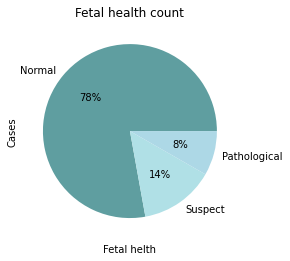

In [17]:
pie_fetal_health = plt.pie([normal_fetus, sus_fetus, pat_fetus], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")

plt.show()

### 4.1 Vetor de correlação com coluna alvo

Um passo que pode nos retornar diversas informações pertinentes, é a checagem de correlação entre colunas. À depender do resultado, poderemos obter por ignorar alguma coluna ou focar nossos esforços em algumas específicas.

Nos próximos passos realizaremos isto.

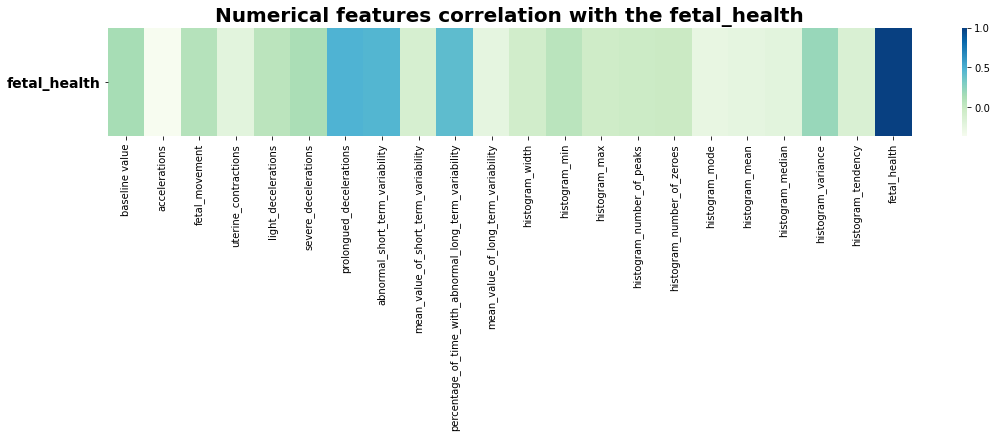

In [65]:
# Graças ao data.info() no início, sabemos que todos os valores no dataset são floats,
# logo não temos tipos "object".

f,ax = plt.subplots(figsize=(18,2))
sns.heatmap(data.corr().sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=20)
plt.yticks(weight="bold", rotation=0, fontsize=14)

plt.show()

Podemos observar agora a existência de uma correlação mais detacável nas seguintes colunas: *prolongued_decelerations*, *abnormal_short_term_variability* e *percentage_of_time_with_abnormal_long_term_variability*.

Porém, graças ao mapa de calor da correlação, é identificável que tais correlações não possuem alto valor.

Sendo assim, descobriremos seus valores numéricos.

In [78]:
numeric_corr = data.corr()["fetal_health"].sort_values(ascending=False).head(22).to_frame()

numeric_corr.style.background_gradient()

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


## 5. Processamento dos dados